# TRAK Features' Distribution

In [1]:

import os
os.environ["PYTHONWARNINGS"] = "ignore"

import sys
sys.path.append('../logistic_regression')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
def data_generation(class1, class2):
    X = np.load('./trak_results/0/features.mmap')
    y = np.load('./trak_results/0/labels.npy')

    # Find unique labels
    unique_labels = np.unique(y)

    # Create a dictionary to hold subsets of data for each label
    data_by_label = {label: {'X': [], 'y': []} for label in unique_labels}

    # Iterate over each sample and its corresponding label
    for sample, label in zip(X, y):
        # Append the sample and its label to the corresponding subset
        data_by_label[label]['X'].append(sample)
        data_by_label[label]['y'].append(label)

    # Convert lists to arrays
    for label in unique_labels:
        data_by_label[label]['X'] = np.array(data_by_label[label]['X'])
        data_by_label[label]['y'] = np.array(data_by_label[label]['y'])

    # Define the classes you want to include
    classes_to_include = [class1, class2]

    # Find the indices of samples belonging to the specified classes
    indices_to_include = np.where(np.isin(y, classes_to_include))

    # Filter X and y based on the selected indices
    X = X[indices_to_include]
    y = y[indices_to_include]

    return X, y

In [3]:
# enumerate all size 2 combination for 10 class
class_combo = [(i, j) for i in range(10) for j in range(i+1, 10)]

num_experiments = len(class_combo)

class1, class2 = class_combo[1]
X, y = data_generation(class1, class2)

# PCA

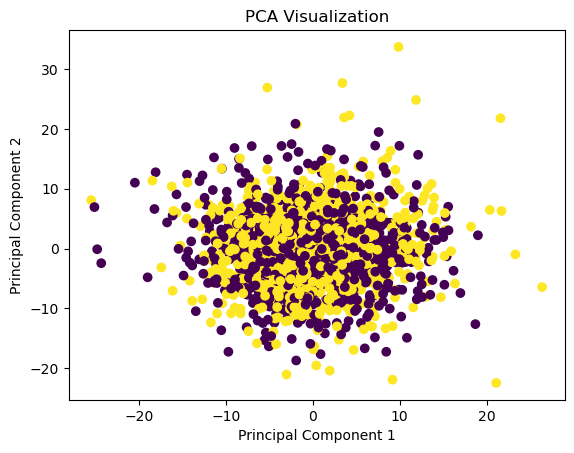

In [4]:
pca = PCA(n_components=2)

# Fit and transform the data
X_pca = pca.fit_transform(X)

# Plot PCA results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

# t-SNE

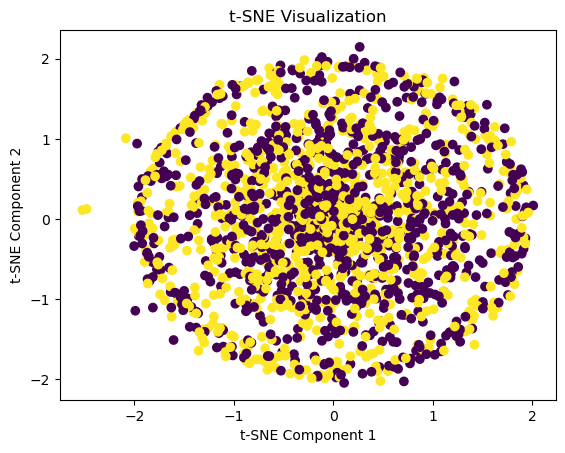

In [7]:
tsne = TSNE(n_components=2, perplexity=100 ,random_state=30)

# Fit and transform the data
X_tsne = tsne.fit_transform(X)

# Plot t-SNE results
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.show()

In [6]:
# Assuming X is your design matrix (n x d)
X_class1 = X[y == class1]
X_class2 = X[y == class2]
y_class1 = y[y == class1]
y_class2 = y[y == class2]

# Compute the mean and covariance of the features for both cases:
for i in range(2):
    if i == 0:
        X_tmp = X_class1
    else:
        X_tmp = X_class2
    mean = np.mean(X_tmp, axis=0)
    covariance = np.cov(X_tmp, rowvar=False)
    print("Mean of Class", i+1, ":", mean)
    # print("Covariance Matrix of Class", i+1, ":", covariance)
    # print the max and the min of the covariance matrix
    print("Max:", np.max(covariance))
    print("Min:", np.min(covariance))

# print the norm difference between the mean of the two classes
print("Norm Difference between the mean of the two classes:", np.linalg.norm(np.mean(X_class1, axis=0) - np.mean(X_class2, axis=0)))

Mean of Class 1 : [-0.4182   -0.0494   -0.1741    0.306    -0.3777    0.09393   0.279
 -0.2101    0.1578   -0.0968   -0.09436  -0.05862  -0.0398    0.1581
  0.3237   -0.1693   -0.0903   -0.007305  0.0921   -0.0917    0.015236
 -0.123    -0.179     0.02733  -0.1179    0.2019   -0.214    -0.03708
 -0.03433   0.3425    0.2051   -0.0777    0.0641   -0.385    -0.02388
 -0.1613    0.1664   -0.02612  -0.0651   -0.17      0.2125   -0.2264
 -0.109    -0.2996    0.005997 -0.2388    0.0645    0.1923   -0.02145
  0.162    -0.0834   -0.216     0.02036  -0.0814    0.414     0.3276
  0.1327   -0.2286   -0.08887  -0.1048    0.1334   -0.01959   0.271
 -0.02065   0.1431   -0.2056   -0.216    -0.1664    0.1683    0.0679
 -0.1134   -0.4026    0.00988   0.01837   0.1731    0.0614    0.2349
  0.0627    0.08795   0.2449    0.02705  -0.0368   -0.04538  -0.2432
  0.1221    0.0554   -0.3137   -0.2069    0.3657    0.08844  -0.2018
 -0.1589   -0.1525    0.2202    0.02708  -0.1885    0.01124   0.0789
 -0.0248   -0